# Hoja de Trabajo No.7 Parte 2 <br/> Mineria de Datos 2020
## Redes Neuronales y SVM
### Antonio Reyes 17273 <br/> Dieter de Wit 15146 <br/> Mineria de Datos 2020


## Predicción de la categoría de las casas utilizando clasificación predicha

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('testRN.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice,Unnamed: 11,Unnamed: 12
0,8450,7,5,856,2,1,3,8,0,548,1,2,2
1,9600,6,8,1262,2,0,3,6,1,460,1,2,2
2,11250,7,5,920,2,1,3,6,1,608,1,2,2
3,9550,7,5,756,1,0,3,7,1,642,1,2,2
4,14260,8,5,1145,2,1,4,9,1,836,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1,2,2
1456,13175,6,6,1542,2,0,3,7,2,500,1,2,2
1457,9042,7,9,1152,2,0,4,9,2,252,2,3,3
1458,9717,5,6,1078,1,0,2,5,0,240,1,2,2


In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     1,     2,     2],
       [ 9600,     6,     8, ...,     1,     2,     2],
       [11250,     7,     5, ...,     1,     2,     2],
       ...,
       [ 9042,     7,     9, ...,     2,     3,     3],
       [ 9717,     5,     6, ...,     1,     2,     2],
       [ 9937,     5,     6, ...,     1,     2,     2]], dtype=int64)

In [4]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.7)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(438, 10) (511, 10) (511, 10) (438,) (511,) (511,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [10]:
Dense(32, activation='relu', input_shape=(10,)),

(<keras.layers.core.Dense at 0x14575ae36c8>,)

In [11]:
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
optimizer='sgd'

In [14]:
loss='binary_crossentropy'

In [15]:
metrics=['accuracy']

In [16]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=400,
          validation_data=(X_val, Y_val))

Train on 438 samples, validate on 511 samples
Epoch 1/400
438/438 [==============================] - 0s 264us/step - loss: 0.6877 - accuracy: 0.3836 - val_loss: 0.5865 - val_accuracy: 0.6321
Epoch 2/400
438/438 [==============================] - 0s 88us/step - loss: 0.5401 - accuracy: 0.6438 - val_loss: 0.4471 - val_accuracy: 0.6360
Epoch 3/400
438/438 [==============================] - 0s 87us/step - loss: 0.4292 - accuracy: 0.6461 - val_loss: 0.3331 - val_accuracy: 0.6360
Epoch 4/400
438/438 [==============================] - 0s 84us/step - loss: 0.3371 - accuracy: 0.6461 - val_loss: 0.2350 - val_accuracy: 0.6360
Epoch 5/400
438/438 [==============================] - 0s 90us/step - loss: 0.2570 - accuracy: 0.6461 - val_loss: 0.1441 - val_accuracy: 0.6360
Epoch 6/400
438/438 [==============================] - 0s 123us/step - loss: 0.1848 - accuracy: 0.6461 - val_loss: 0.0623 - val_accuracy: 0.6360
Epoch 7/400
438/438 [==============================] - 0s 89us/step - loss: 0.1213 - acc

Epoch 112/400
438/438 [==============================] - 0s 91us/step - loss: -0.2912 - accuracy: 0.6530 - val_loss: -0.4613 - val_accuracy: 0.6438
Epoch 113/400
438/438 [==============================] - 0s 93us/step - loss: -0.3109 - accuracy: 0.6575 - val_loss: -0.4836 - val_accuracy: 0.6497
Epoch 114/400
438/438 [==============================] - 0s 73us/step - loss: -0.3306 - accuracy: 0.6575 - val_loss: -0.5062 - val_accuracy: 0.6497
Epoch 115/400
438/438 [==============================] - 0s 79us/step - loss: -0.3510 - accuracy: 0.6621 - val_loss: -0.5297 - val_accuracy: 0.6497
Epoch 116/400
438/438 [==============================] - 0s 61us/step - loss: -0.3724 - accuracy: 0.6644 - val_loss: -0.5553 - val_accuracy: 0.6497
Epoch 117/400
438/438 [==============================] - 0s 73us/step - loss: -0.3942 - accuracy: 0.6667 - val_loss: -0.5819 - val_accuracy: 0.6497
Epoch 118/400
438/438 [==============================] - 0s 76us/step - loss: -0.4191 - accuracy: 0.6667 - val_l

Epoch 223/400
438/438 [==============================] - 0s 66us/step - loss: 0.0402 - accuracy: 0.6461 - val_loss: -0.1432 - val_accuracy: 0.6360
Epoch 224/400
438/438 [==============================] - 0s 73us/step - loss: 0.0398 - accuracy: 0.6461 - val_loss: -0.1439 - val_accuracy: 0.6360
Epoch 225/400
438/438 [==============================] - 0s 59us/step - loss: 0.0396 - accuracy: 0.6461 - val_loss: -0.1446 - val_accuracy: 0.6360
Epoch 226/400
438/438 [==============================] - 0s 68us/step - loss: 0.0392 - accuracy: 0.6461 - val_loss: -0.1453 - val_accuracy: 0.6360
Epoch 227/400
438/438 [==============================] - 0s 68us/step - loss: 0.0389 - accuracy: 0.6461 - val_loss: -0.1461 - val_accuracy: 0.6360
Epoch 228/400
438/438 [==============================] - 0s 64us/step - loss: 0.0386 - accuracy: 0.6461 - val_loss: -0.1467 - val_accuracy: 0.6360
Epoch 229/400
438/438 [==============================] - 0s 59us/step - loss: 0.0384 - accuracy: 0.6461 - val_loss: -0

Epoch 279/400
438/438 [==============================] - 0s 78us/step - loss: 0.0268 - accuracy: 0.6461 - val_loss: -0.1757 - val_accuracy: 0.6360
Epoch 280/400
438/438 [==============================] - 0s 75us/step - loss: 0.0266 - accuracy: 0.6461 - val_loss: -0.1763 - val_accuracy: 0.6360
Epoch 281/400
438/438 [==============================] - 0s 84us/step - loss: 0.0264 - accuracy: 0.6461 - val_loss: -0.1768 - val_accuracy: 0.6360
Epoch 282/400
438/438 [==============================] - 0s 70us/step - loss: 0.0263 - accuracy: 0.6461 - val_loss: -0.1773 - val_accuracy: 0.6360
Epoch 283/400
438/438 [==============================] - 0s 57us/step - loss: 0.0261 - accuracy: 0.6461 - val_loss: -0.1777 - val_accuracy: 0.6360
Epoch 284/400
438/438 [==============================] - 0s 63us/step - loss: 0.0259 - accuracy: 0.6461 - val_loss: -0.1782 - val_accuracy: 0.6360
Epoch 285/400
438/438 [==============================] - 0s 66us/step - loss: 0.0258 - accuracy: 0.6461 - val_loss: -0

Epoch 335/400
438/438 [==============================] - 0s 57us/step - loss: 0.0188 - accuracy: 0.6461 - val_loss: -0.1987 - val_accuracy: 0.6360
Epoch 336/400
438/438 [==============================] - 0s 78us/step - loss: 0.0187 - accuracy: 0.6461 - val_loss: -0.1990 - val_accuracy: 0.6360
Epoch 337/400
438/438 [==============================] - 0s 64us/step - loss: 0.0186 - accuracy: 0.6461 - val_loss: -0.1994 - val_accuracy: 0.6360
Epoch 338/400
438/438 [==============================] - 0s 73us/step - loss: 0.0184 - accuracy: 0.6461 - val_loss: -0.1997 - val_accuracy: 0.6360
Epoch 339/400
438/438 [==============================] - 0s 61us/step - loss: 0.0184 - accuracy: 0.6461 - val_loss: -0.2001 - val_accuracy: 0.6360
Epoch 340/400
438/438 [==============================] - 0s 63us/step - loss: 0.0182 - accuracy: 0.6461 - val_loss: -0.2004 - val_accuracy: 0.6360
Epoch 341/400
438/438 [==============================] - 0s 68us/step - loss: 0.0181 - accuracy: 0.6461 - val_loss: -0

Epoch 391/400
438/438 [==============================] - 0s 71us/step - loss: 0.0134 - accuracy: 0.6461 - val_loss: -0.2164 - val_accuracy: 0.6360
Epoch 392/400
438/438 [==============================] - 0s 87us/step - loss: 0.0133 - accuracy: 0.6461 - val_loss: -0.2167 - val_accuracy: 0.6360
Epoch 393/400
438/438 [==============================] - 0s 87us/step - loss: 0.0132 - accuracy: 0.6461 - val_loss: -0.2169 - val_accuracy: 0.6360
Epoch 394/400
438/438 [==============================] - 0s 66us/step - loss: 0.0132 - accuracy: 0.6461 - val_loss: -0.2171 - val_accuracy: 0.6360
Epoch 395/400
438/438 [==============================] - 0s 109us/step - loss: 0.0131 - accuracy: 0.6461 - val_loss: -0.2174 - val_accuracy: 0.6360
Epoch 396/400
438/438 [==============================] - 0s 75us/step - loss: 0.0130 - accuracy: 0.6461 - val_loss: -0.2177 - val_accuracy: 0.6360
Epoch 397/400
438/438 [==============================] - 0s 71us/step - loss: 0.0129 - accuracy: 0.6461 - val_loss: -

# Certeza

In [17]:
model.evaluate(X_test, Y_test)[1]

511/511 [==============================] - 0s 19us/step


0.6497064828872681

# Visualizar

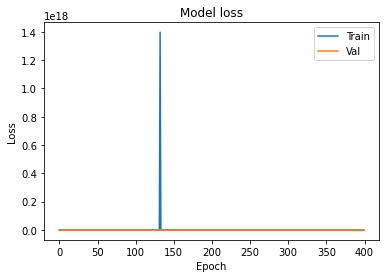

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

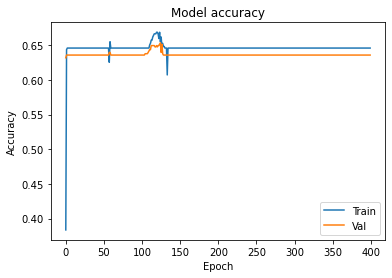

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization

In [20]:


model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Train on 438 samples, validate on 511 samples
Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: -3.2797 - accuracy: 0.6461 - val_loss: -33.8329 - val_accuracy: 0.6360
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: -130.5850 - accuracy: 0.6461 - val_loss: -759.4158 - val_accuracy: 0.6360
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: -1553.7012 - accuracy: 0.6461 - val_loss: -5745.0455 - val_accuracy: 0.6360
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: -11141.6123 - accuracy: 0.6461 - val_loss: -32854.8433 - val_accuracy: 0.6360
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: -48892.7081 - accuracy: 0.6461 - val_loss: -136612.9488 - val_accuracy: 0.6360
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: -174779.2290 - accuracy: 0.6461 - val_loss: -420226.8230 - val_accuracy: 0.6360
Epoch 7/100
438/438 [=========================

438/438 [==============================] - 1s 2ms/step - loss: -2921731307398.4292 - accuracy: 0.6484 - val_loss: -4019205054223.5308 - val_accuracy: 0.6360
Epoch 100/100
438/438 [==============================] - 1s 2ms/step - loss: -3053399705347.5068 - accuracy: 0.6484 - val_loss: -4214497098012.5552 - val_accuracy: 0.6360


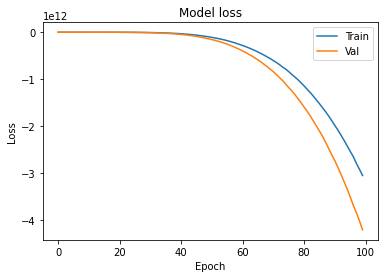

In [21]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()